# Part II - (Prosper Loan Data)
## by (Ijeoma Mariam Okocha - mariokocha@gmail.com)





## Investigation Overview


>There are three main features i looked at and they are;
a. Estimated Returns -- The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.
b. BorrowerAPR -- The Borrower's cost rate for this loan. 
c. CurrentDelinquencies -- Number of accounts delinquent at the time the credit profile was pulled.

## Dataset Overview

> There are 113937 entries of loan data and 81 columns where 61 columns are numerical, 3 boolean and the rest strings (although there are date-type represented as objects) We would just select a few columns to work with The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009.The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses. A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.
> We used a few variables in the data set.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')
loan= loans.copy()


## (Visualization 1)

> Investigating the trend of the EstimatedReturn, we removed outliers and null values from the data

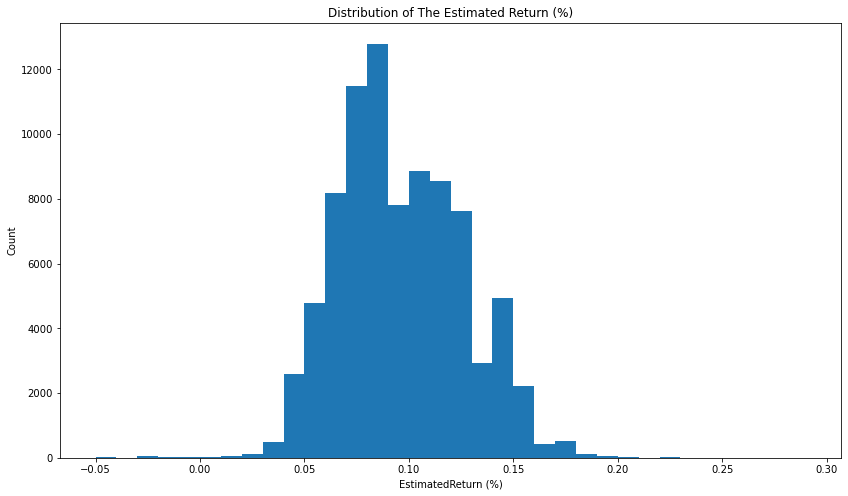

In [3]:
# start with a standard-scaled plot
binsize = 0.01
bins = np.arange(-0.05, loan['EstimatedReturn'].max()+binsize, binsize)

plt.figure(figsize=[14, 8])
plt.hist(data = loan, x = 'EstimatedReturn', bins = bins)
plt.title('Distribution of The Estimated Return (%)')
plt.xlabel('EstimatedReturn (%)')
plt.ylabel('Count')

plt.show()

In [4]:
#outliers, using criteria eyeballed from the plots
loan.drop(loan[(loan['EstimatedReturn'] < 0.00) | (loan['EstimatedReturn'] > 0.21)].index, inplace=True)
#loan.shape
loan= loan[loan['EstimatedReturn'].notna()]
loan.shape

(84606, 81)

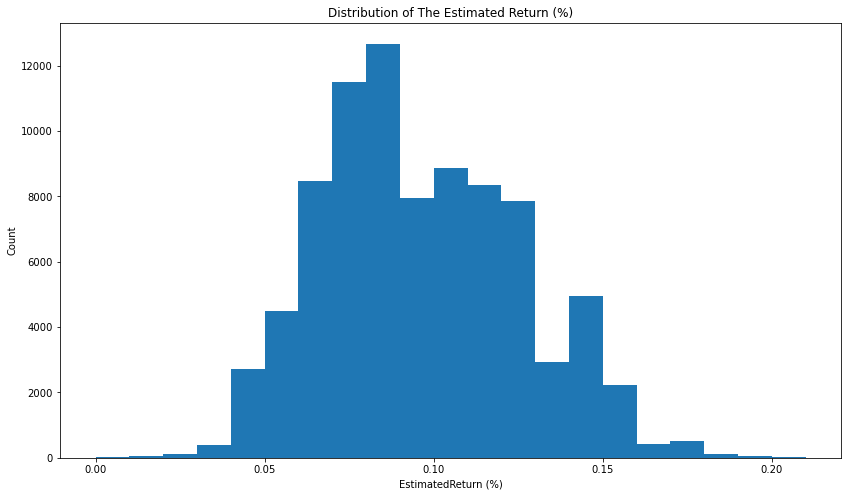

In [5]:
# re-plot the distribution of EstimatedReturn
binsize = 0.01
bins = np.arange(0, loan['EstimatedReturn'].max()+binsize, binsize)

plt.figure(figsize=[14, 8])
plt.hist(data = loan, x = 'EstimatedReturn', bins = bins)
plt.title('Distribution of The Estimated Return (%)')
plt.xlabel('EstimatedReturn (%)')
plt.ylabel('Count')
plt.show()



> From investigating the Borrower APR we found that there is no null value in BorrowerAPR, so every borrower in this data set paid for the loan given as the least percentage for BorrowerAPR is 0.04%, is this amount enough to make profit? Comparing Borrower APR to the Estimated Return, there i always a record of return, no matter how small it seems to be. Which shows that 0.04% should be the least Annual Rate to expect returns or profits. Even the low rates has a low amount of Estimated Effective Yield and low Estimated loss, most importantly Estimated Return and so is still suitable for the data set.

In [6]:
loan['BorrowerAPR'].isnull().sum()

# we would look at these at set closely
low_rate = (loan['BorrowerAPR'] < 0.06)
print(loan.loc[low_rate,['BorrowerAPR','EstimatedReturn','EstimatedEffectiveYield','EstimatedLoss','BorrowerRate', 'LenderYield']])

        BorrowerAPR  EstimatedReturn  EstimatedEffectiveYield  EstimatedLoss  \
913         0.05927           0.0245                   0.0400         0.0155   
1749        0.05927           0.0245                   0.0400         0.0155   
1839        0.04583           0.0266                   0.0266         0.0060   
3400        0.05927           0.0245                   0.0400         0.0155   
5384        0.05927           0.0245                   0.0400         0.0155   
8072        0.05525           0.0290                   0.0290         0.0130   
9517        0.04935           0.0171                   0.0171         0.0130   
12720       0.05927           0.0245                   0.0400         0.0155   
17455       0.05927           0.0245                   0.0400         0.0155   
20358       0.05335           0.0341                   0.0341         0.0060   
25261       0.05927           0.0245                   0.0400         0.0155   
28411       0.05927           0.0245    

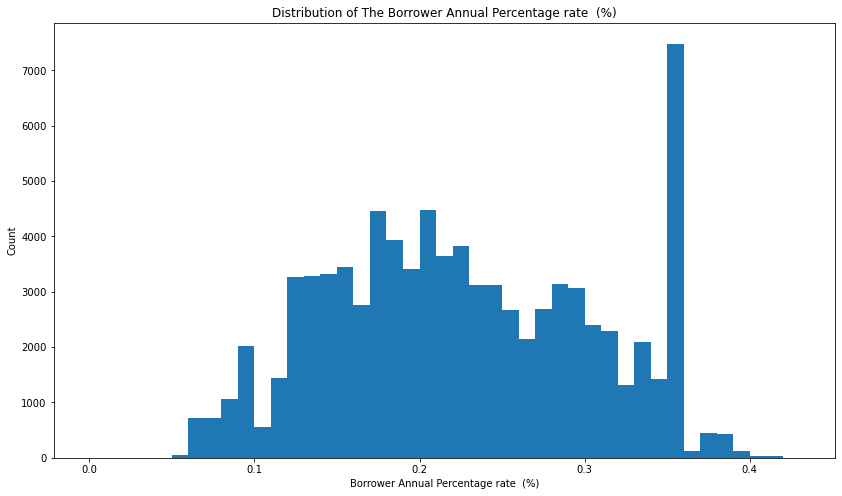

In [7]:
# investigating with a standard-scaled plot
binsize = 0.01
bins = np.arange(0, loan['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[14,8])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins)
plt.title('Distribution of The Borrower Annual Percentage rate  (%)')
plt.xlabel('Borrower Annual Percentage rate  (%)')
plt.ylabel('Count') 
plt.show()

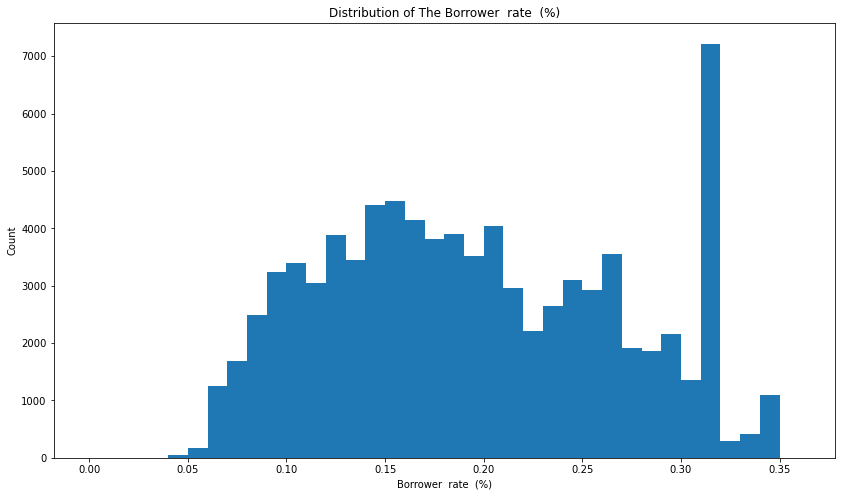

In [8]:
# investigating Behaviour of The Borrower Rate in the Data Set
binsize = 0.01
bins = np.arange(0, loan['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[14,8])
plt.hist(data = loan, x = 'BorrowerRate', bins = bins)

plt.title('Distribution of The Borrower  rate  (%)')
plt.xlabel('Borrower  rate  (%)')
plt.ylabel('Count') 
plt.show()

The BorrowerRate and the BorrowerAPR seems strong correlation and they look similar, and it ought to be since the later is the annual percentage rate. The both seems to be strongly hinged on the Lender Yeild.Lender yield is equal to the interest rate on the loan less the servicing fee. The Service Fees seems little. We would look more into this the Bivariate Exploration. 

## (Visualization 2)

The company has more Curent Loan status and then followed by completed status it looks good, and considering the accounts in Current Delinquecy which is after comes along with the Pass Due Status, and looking at the Current Delinquencies, its just a small category in the Delinquencies, the ProsperLoan company is safe in business, and its noteworthy to know that Defaulted and Finalpaymentin progress borrowers are very little.Making it a safe balance for the Loan business From the Prosper rating we see that C has the most counts followed by B then A, the least count is the AA rating.The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009. California (CA), NewYork (NY), and Texas (TX) is the top #3 Borrower State.

In [9]:
# convert into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Cancelled','Chargedoff','Completed','Current','Defaulted','FinalPaymentInProgress','PastDue'],
                    'ProsperRating (Alpha)': ['NaN', 'HR', 'E', 'D', 'C', 'B', 'A','AA'],
                    'ProsperRating (numeric)': ['0', '1', '2', '3', '4', '5', '6', '7'],
                    'ProsperScore': ['1','2','3','4','5','6','7','8','9','10'] }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

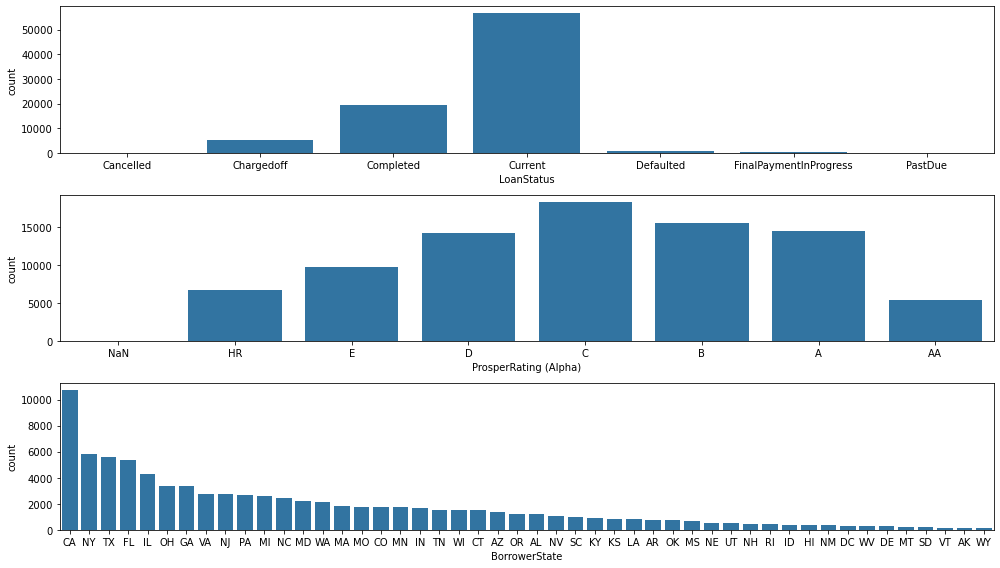

In [30]:
# let's plot LoanStatus,ProsperRating and Borrower state to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize=[14, 8])

default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'LoanStatus', color = default_color, ax = ax[0])
sb.countplot(data = loan, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = loan, x = 'BorrowerState', color = default_color, ax = ax[2], order=loan['BorrowerState'].value_counts().index)
plt.tight_layout()
plt.show()

In [11]:
numeric_vars = ['EstimatedReturn', 'BorrowerAPR', 'LenderYield', 'AmountDelinquent', 'CurrentDelinquencies', 'BorrowerRate', 'Term']
categoric_vars = ['LoanStatus', 'ProsperRating (Alpha)']

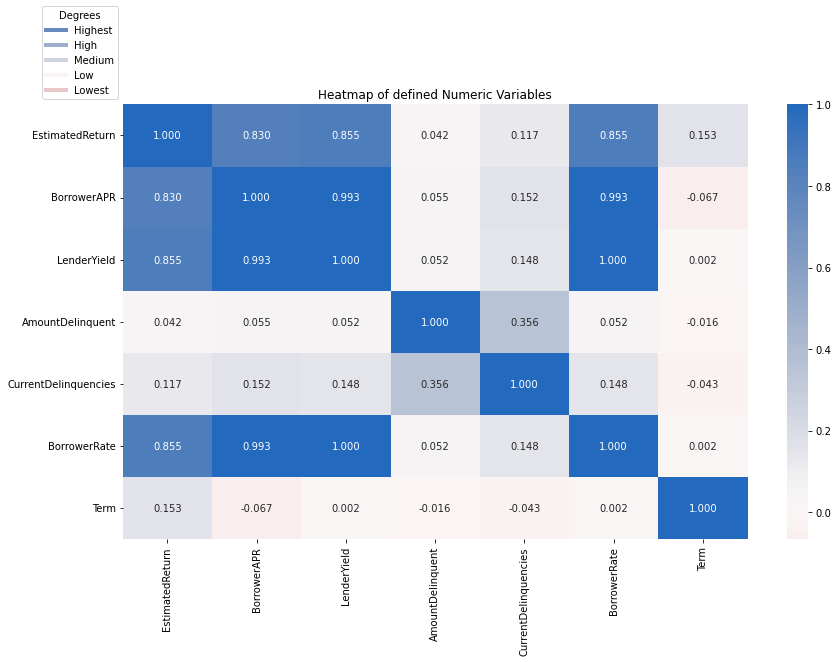

In [21]:
# correlation plot

from matplotlib.lines import Line2D

plt.figure(figsize = [14,8])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)


color = list(sb.color_palette("vlag", 7))
custom_lines = []
for i in range(5):
    custom_lines.append(Line2D([0], [0], color=color[i], lw = 4))

plt.legend(custom_lines, ["Highest", "High", "Medium", "Low", "Lowest"], loc="lower right", bbox_to_anchor = (0,1), title="Degrees")
plt.title("Heatmap of defined Numeric Variables")
plt.show()

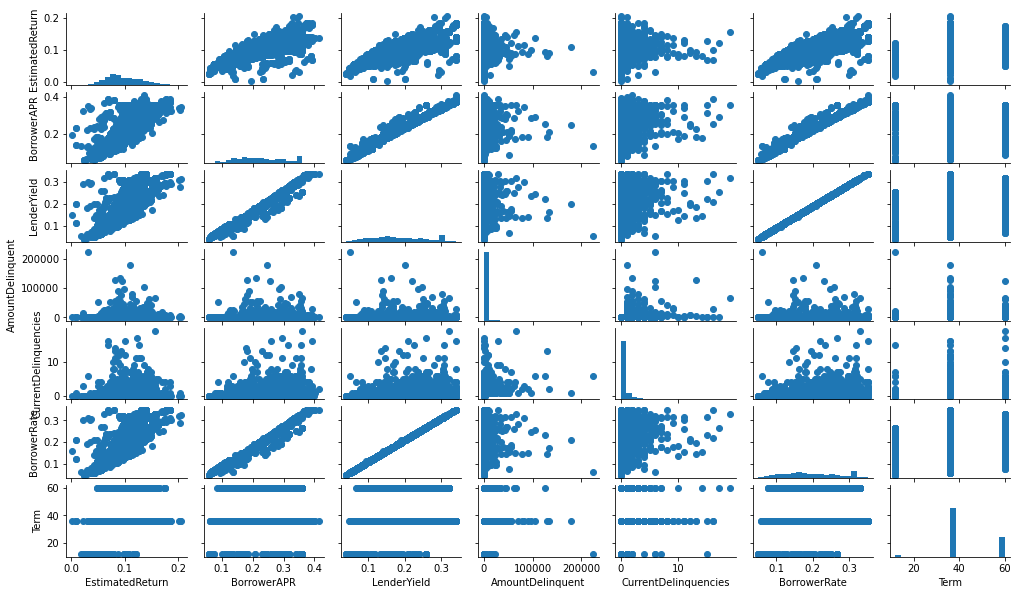

In [13]:
# plot matrix: sample 5000 loans so that plots are clearer and they render faster
# print("loan.shape=",loan.shape)
loan_samp = loan.sample(n=5000, replace = False)
# print("loan_samp.shape=",loan_samp.shape)

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.fig.set_size_inches(14, 8);

g.map_offdiag(plt.scatter);

### Relationship between variables

From the above we can see a strong correlation between theBorrower rate,EstimatedReturn, and LenderYeild, these shows to affect each other, as the BorrowRate seem to have the strongest correlation with the LenderYield,The plots show that the BorrowerRate is depended on the LenderYeild. The BorrowerAPR is the LenderYeild plus the service Charges of Prosperloan. The Estimated Return is the expected profit to be made after deducting the Effectiveloss and Service Charge from the Estimated EffectiveYeild. Generally it shows that the Prosperloan company runs at profit as the Current Delinquencies shows to be in just a few account majorly in the range 0-5000 dollars which has an average of about $950 and just rare cases above this. This shows proper management of loan. The major loan term is 3year followed by 5years.

In [14]:
# convert into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Cancelled','Chargedoff','Completed','Current','Defaulted','FinalPaymentInProgress','PastDue'],
                    'ProsperRating (Alpha)': ['NaN', 'HR', 'E', 'D', 'C', 'B', 'A','AA'],
                    'ProsperRating (numeric)': ['0', '1', '2', '3', '4', '5', '6', '7'],
                    'ProsperScore': ['1','2','3','4','5','6','7','8','9','10'] }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

In [15]:
#Selecting the Top 5 states to analyse
top_5_states = ['CA','NY','TX','FL','IL']
loan_bs = loan[loan.BorrowerState.isin(top_5_states) == True]

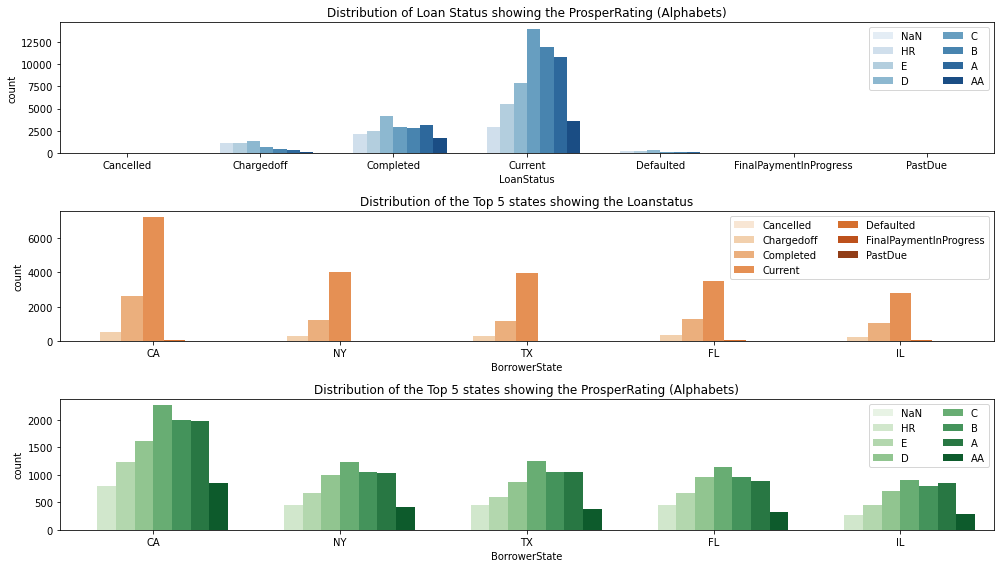

In [29]:
# since there's only three subplots to create, using the Top 5 states to analyse.
plt.figure(figsize = [14,8])

# subplot 1: LoanStatus vs ProsperRating
ax = plt.subplot(3, 1, 1)
sb.countplot(data = loan, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
ax.legend(loc = 1, ncol = 2)
plt.title("Distribution of Loan Status showing the ProsperRating (Alphabets)")

# subplot 2:Top 5 States vs loanStatus, use different color palette
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_bs, x = 'BorrowerState', hue = 'LoanStatus', palette = 'Oranges', order=loan_bs['BorrowerState'].value_counts().index)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to reduce overlapping
plt.title("Distribution of the Top 5 states showing the Loanstatus")

# subplot 3: Top 5 States vs loanStatus, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_bs, x = 'BorrowerState', hue = 'ProsperRating (Alpha)', palette = 'Greens', order=loan_bs['BorrowerState'].value_counts().index)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.title("Distribution of the Top 5 states showing the ProsperRating (Alphabets)")
plt.tight_layout()

plt.show()

## (Visualization 3)

In [17]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 0.3, .01)
    bins_y = np.arange(0, 0.4+0.1, 0.01)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.colorbar()

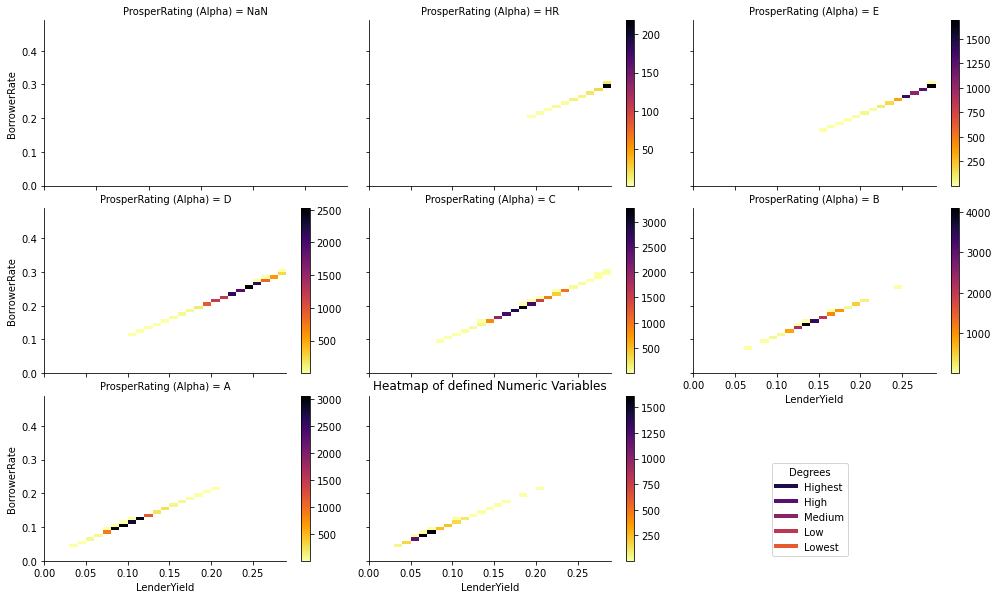

In [18]:
g = sb.FacetGrid(data = loan, col = 'ProsperRating (Alpha)', col_wrap = 3, height = 5)
g.map(hist2dgrid, 'LenderYield', 'BorrowerRate', color = plt.cm.inferno_r)
color = list(sb.color_palette("inferno", 7))
g.fig.set_size_inches(14, 8);
custom_lines = []
for i in range(5):
    custom_lines.append(Line2D([0], [0], color=color[i], lw = 4))

plt.legend(custom_lines, ["Highest", "High", "Medium", "Low", "Lowest"], loc="lower right", bbox_to_anchor = (2,0), title="Degrees")
plt.title("Heatmap of defined Numeric Variables")

plt.show()

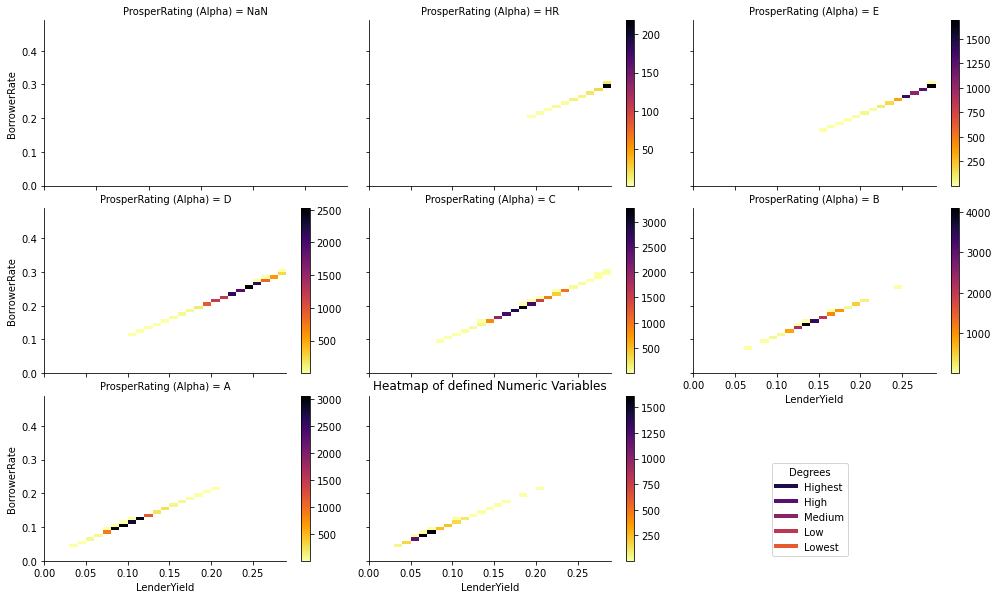

In [19]:
g = sb.FacetGrid(data = loan, col = 'ProsperRating (Alpha)', col_wrap = 3, height = 5)
g.map(hist2dgrid, 'LenderYield', 'BorrowerRate', color = plt.cm.inferno_r)
g.fig.set_size_inches(14, 8);
custom_lines = []
for i in range(5):
    custom_lines.append(Line2D([0], [0], color=color[i], lw = 4))

plt.legend(custom_lines, ["Highest", "High", "Medium", "Low", "Lowest"], loc="lower right", bbox_to_anchor = (2,0), title="Degrees")
plt.title("Heatmap of defined Numeric Variables")

plt.show()

Depending on what the ratings are (The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009.) It might have been a way to categorize things within the company. Looking closely, here its shows that the highest and lowest ratings have the lowest counts, but also see that the Lender yeild rate affects the Prosper ratings as AA- is the least below 0.10% as it increases up accordingly to HR the highest having concentrated rate after 0.2%

## Conclusions
Since we were given Prosper ratings and there various ponts, we didn't know the order and what influences the ratings. From the above analysis its found that The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Where the highest LenderYeild which affects the ratings starts from HR to AA and HR is the highest rating.
 Californa state is shown to be the most profitable as it hold a huge amount of Current Loan Satus ad Completed Status with low Default. More Effort should be concentrate on the First 5 cities to bring more profitable loan Traction.
Lenderyeild, BorrowerRate and BorrowerAPR are three variables that go hand in hand and affects the Prosperrating. Propser Score was found to be null, the whole column.
Current delinquencies and Delinquent amount showed that most Current delinquencies had an amount of $(1-5000) an a few current Delinquencies that had high figures.
 >  The ProsperLoan Company seem to have a very good management and shows to be making its profits, even though the service charges seems to have a small percentage, it has more Completed and Current loan status. There is largely an estimate return of profit for all loans and very few losses.
    There was no trend with the CurrentDelinquencies to show why Customers fall in that category. 


### References
> https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv%26amp;sa%3DD%26amp;ust%3D1581581520570000&sa=D&source=editors&ust=1665050815945330&usg=AOvVaw12pLqWGmGQ4DWjG5mvmk6X
>  www.google.com
> https://seaborn.pydata.org

In [ ]:
!jupyter nbconvert "Part_II_slide_Project Visualisation.ipynb" --to slides --post serve --no-input --no-prompt